In [1]:
% matplotlib inline

# 序列模型
使用正弦函数函数和一些可加性噪声来生成序列数据，时间步为 1,2,...,1000

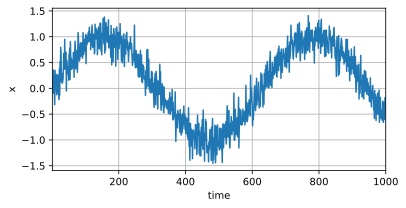

In [3]:
import tensorflow as tf
from d2l import tensorflow as d2l

T = 1000  # 生成 1000 个点
time = tf.range(1, T + 1, dtype=tf.float32)
x = tf.sin(0.01 * time) + tf.random.normal([T], 0, 0.2)
d2l.plot(time, [x], 'time', 'x', xlim=[1, 1000], figsize=(6, 3))

对上面的序列数据，目标是，给定过去的数据，预测未来的数据。

接下来用 markov 假设，将数据映射为数据对 $y_t=x_t$ 和 $x_t=[x_{t-\tau},...,x_{t-1}]$

In [4]:
tau = 4
features = tf.Variable(tf.zeros((T - tau, tau)))  # T-tao 是样本数
for i in range(tau):
    features[:, i].assign(x[i:T - tau + i])
labels = tf.reshape(x[tau:], (-1, 1))

batch_size, n_train = 16, 600
train_iter = d2l.load_array((features[:n_train], labels[:n_train]),
                            batch_size, is_train=True)

下面使用一个相当简单的架构训练模型：一个拥有两个全连接层的多层感知机，ReLU 激活函数和平方损失。

In [5]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow import keras


def get_net():
    net = models.Sequential([layers.Dense(10, activation='relu'),
                             layers.Dense(1)])
    return net


# 最小均方损失
loss = losses.MeanSquaredError()

In [6]:
from tensorflow.keras import optimizers


def train(net, train_iter, loss, epochs, lr):
    trainer = optimizers.Adam()
    for epoch in range(epochs):
        for X, y in train_iter:
            with tf.GradientTape() as g:
                out = net(X)
                l = loss(y, out) / 2
                params = net.trainable_variables
                grads = g.gradient(l, params)
            trainer.apply_gradients(zip(grads, params))
        print(f'epoch {epoch + 1}, '
              f'loss: {d2l.evaluate_loss(net, train_iter, labels):f}')


net = get_net()
train(net, train_iter, loss, 5, 0.01)

TypeError: 'tensorflow.python.framework.ops.EagerTensor' object is not callable